In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

import nltk

In [94]:
#Read in data
df = pd.read_csv("Reviews.csv")

In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [26]:
print(df.shape)

(568454, 10)


In [96]:
df = df.head(10000)
print(df.shape)

(10000, 10)


In [97]:
df['Score'].value_counts()

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

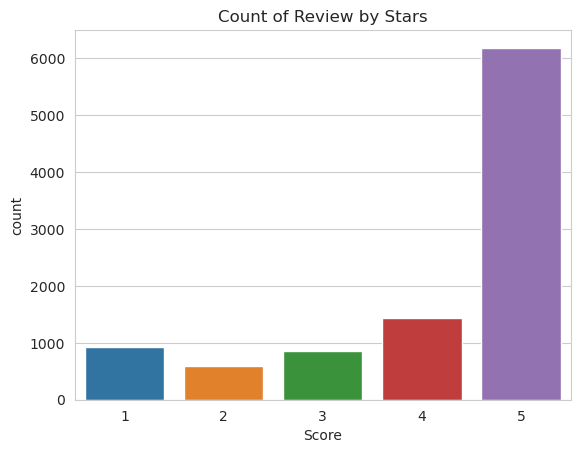

In [131]:
sns.set_style('whitegrid')
sns.countplot(x = df['Score']).set(title = 'Count of Review by Stars')
sns.reset_orig()
plt.show()

# VADER MODEL

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [37]:
sia = SentimentIntensityAnalyzer()

In [45]:
#the compound score ranges from -1 to 1, it is aggregation of neg, new and pos
#the more it's on the positive side, the more the text is likely to be positve and vice versa
sia.polarity_scores("I am happy today")

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

In [47]:
#negative text - negative score
sia.polarity_scores("I hate you")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [99]:
#run the polarity score on the entire dataframe
scores = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    Id = row['Id']
    scores[Id] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [100]:
print(scores)

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}, 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}, 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}, 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}, 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}, 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}, 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}, 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}, 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}, 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}, 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}, 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}, 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}, 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}, 16: {'neg': 0.0

In [101]:
#.T flips everything vertically
vaders = pd.DataFrame(scores).T

In [102]:
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
9996,0.089,0.852,0.059,-0.5267
9997,0.091,0.747,0.162,0.6808
9998,0.063,0.811,0.126,0.9305
9999,0.149,0.697,0.154,0.2809


In [103]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})

In [104]:
#merging the two data frames
vaders = vaders.merge(df, how = 'left')

In [105]:
#now we have sentiment scores and the original data
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [72]:
#Assumptions: If the score of the product the user gave is a 5 star, then the text is most likely to be positive
# vice versa for a 1 star review, the text is likely to be negative

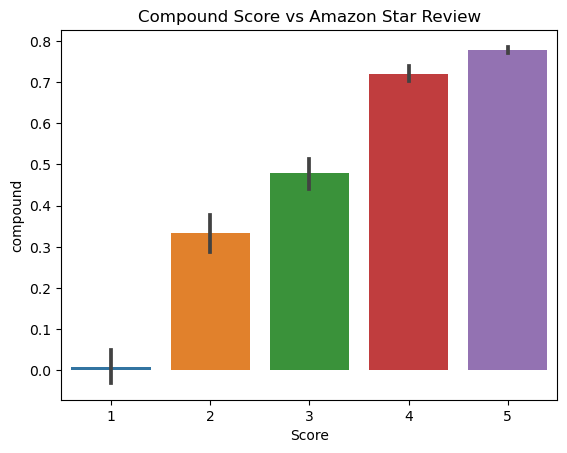

In [116]:
scoreGraph = sns.barplot(data = vaders, x = 'Score', y = 'compound')
scoreGraph.set_title('Compound Score vs Amazon Star Review')
sns.reset_orig()
plt.show()

In [119]:
# 1-star reviews have a lower compound score while 5-star reviews have a higher compound score
#the higher the star rating, the more positive the text review is

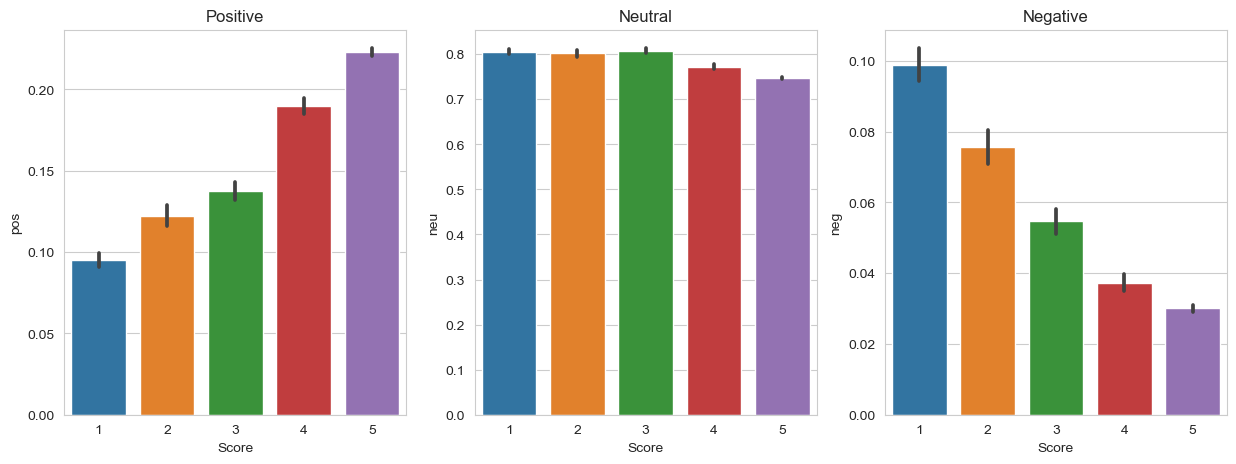

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axes[0]).set_title('Positive')
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axes[1]).set_title('Neutral')
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax = axes[2]).set_title('Negative')
plt.show()

In [130]:
#Positive - positivity is higher when the star rating is higher
#Neutral - the scores are around the same range
#Negative - it becomes less negative of a review as the star rating goes higher

VADER Model - This model just looked at each word in each sentence and score each word individually. VADER relies on a pre-defined sentiment lexicon that contains a list of words and their associated sentiment scores. Each word in the lexicon is assigned a sentiment polarity score, which indicates the word's positivity or negativity. VADER then calculates the sentiment intensity of a given text by summing up the sentiment scores of individual words in the text, while considering their context and grammar. It also accounts for the degree of intensity conveyed by intensifiers and modifiers. The final sentiment intensity score represents the overall sentiment of the text. While it performs well in many cases, it may not capture all subtleties of sentiment and context. 

A lexicon refers to a collection of words or terms with their corresponding meanings, sentiment scores, or other linguistic properties. It can be considered as a vocabulary or dictionary specific to a particular domain, language, or application. In the context of sentiment analysis, a sentiment lexicon contains words or phrases along with their associated sentiment polarity or intensity scores. Each word or phrase in the lexicon is assigned a sentiment label or score indicating whether it is positive, negative, or neutral. Lexicons can also provide additional information, such as the strength of the sentiment expressed by a word or its subjectivity.

# Roberta Pretrained Model

This transformer model accounts for words in context and in relation to other words in the sentence.

In [141]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [136]:
from scipy.special import softmax

In [143]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


This model was pretrained on a bunch of twitter comments that was labelled. This is provided by Hugging Face. When we run the AutoTokenizer and the AutoModel methods and load it from a pretrained model, it will get the model weights that had been stored. So, we don't have to retrain the model at all, we can just use the trained weights and apply it to our dataset.

In [150]:
#example for VADER Model
example = df['Text'][0]
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [152]:
#example for Roberta Model
encoded = tokenizer(example, return_tensors='tf')
results = model(**encoded)

In [155]:
results

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-1.9043212, -0.2569729,  2.677701 ]], dtype=float32)>, hidden_states=None, attentions=None)

In [157]:
sentiment = results.logits.numpy()
sentiment = softmax(sentiment)
sentiment

array([[0.00962418, 0.04998019, 0.9403956 ]], dtype=float32)

In [160]:
example_sentiment_dict = {
    'roberta_neg' : sentiment[0][0],
    'roberta_neu' : sentiment[0][1],
    'roberta_pos' : sentiment[0][2]
}
print(example_sentiment_dict)

{'roberta_neg': 0.009624178, 'roberta_neu': 0.049980193, 'roberta_pos': 0.9403956}


"I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most." --> This review does sound like that the user has liked the product and has given a positive rating. The VADER model has given this a positivity probability of 0.305, whereas the Roberta Model much more than the VADER model thinks that this comment is postive with a probability of 0.94.

In [164]:
def polarity_scores_roberta(example):
    encoded = tokenizer(example, return_tensors='tf')
    results = model(**encoded)
    sentiment = results.logits.numpy()
    sentiment = softmax(sentiment)
    scores_dict = {
        'roberta_neg' : sentiment[0][0],
        'roberta_neu' : sentiment[0][1],
        'roberta_pos' : sentiment[0][2]
    }
    return scores_dict

In [168]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        iD = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both_models = {**vader_result_rename, **roberta_result}
        res[iD] = both_models
    except Exception as e:
        print(f'Broke for id {iD}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583
Broke for id 5040
Broke for id 5182
Broke for id 5192
Broke for id 5365
Broke for id 5442
Broke for id 5709
Broke for id 5998
Broke for id 6003
Broke for id 6007
Broke for id 6106
Broke for id 6234
Broke for id 6558

In [169]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [170]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


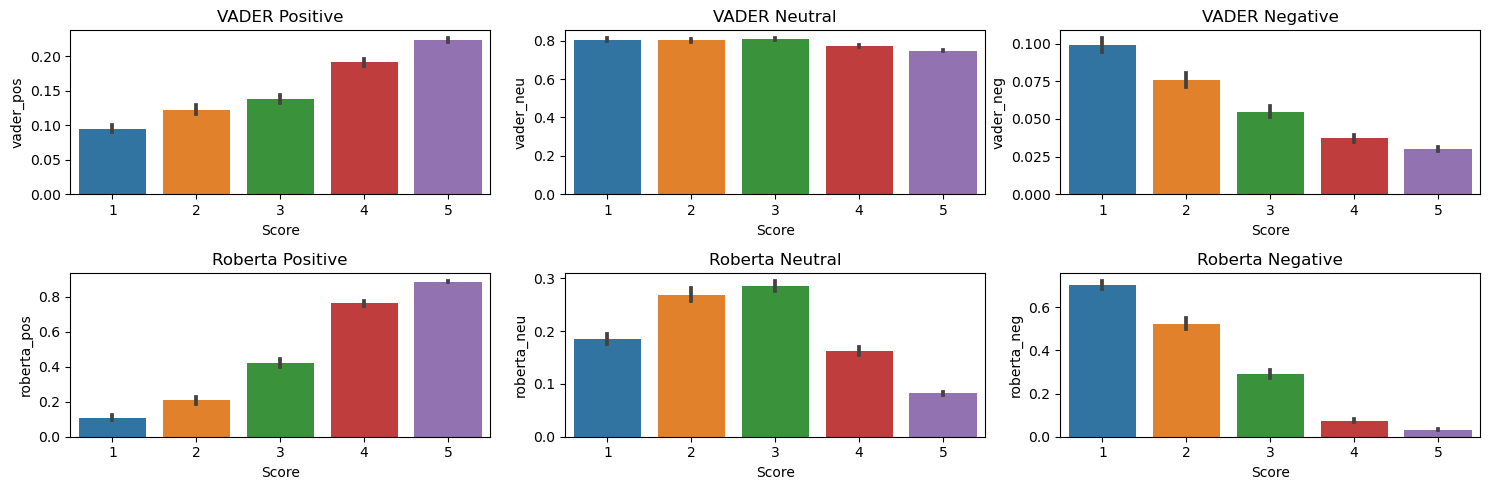

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
sns.barplot(data = results_df, x = 'Score', y = 'vader_pos', ax = axes[0,0]).set_title('VADER Positive')
sns.barplot(data = results_df, x = 'Score', y = 'vader_neu', ax = axes[0,1]).set_title('VADER Neutral')
sns.barplot(data = results_df, x = 'Score', y = 'vader_neg', ax = axes[0,2]).set_title('VADER Negative')
sns.barplot(data = results_df, x = 'Score', y = 'roberta_pos', ax = axes[1,0]).set_title('Roberta Positive')
sns.barplot(data = results_df, x = 'Score', y = 'roberta_neu', ax = axes[1,1]).set_title('Roberta Neutral')
sns.barplot(data = results_df, x = 'Score', y = 'roberta_neg', ax = axes[1,2]).set_title('Roberta Negative')
plt.tight_layout()
plt.show()

We can see that the VADER model has classified significantly more texts as positive even though they receied a low star rating. The Roberta model has reduced that. The VADER model also classified a lot of comments as negative even though their star rating was a 4 or 5. While the Roberta model has a significantly low number of comments that are classfied as negative and have a high star rating. The Roberta model has also reduced the number of reviews classified as neutral, giving a more realistic classification. The Roberta model was able to give a more accurate classification because it was able to take words in relation with other words and in different contexts, which the VADER model was not able to do.

In [188]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending = False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [2]:
def assign_sentiment_label(row):
    #Extract the probabilities from the row
    prob_neg = row['roberta_neg']
    prob_neu = row['roberta_neu']
    prob_pos = row['roberta_pos']

    #Determine the sentiment label based on the column with the highest probability
    if prob_neg > prob_neu and prob_neg > prob_pos:
        return 'Negative'
    elif prob_neu > prob_neg and prob_neu > prob_pos:
        return 'Neutral'
    #Accounts for the reviews that couldn't be cassified by the model
    elif prob_neg == 0 and prob_neu == 0 and prob_pos == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [3]:
#Create an empty list to store the sentiment labels
sentiment_labels = []

#Loop through each row in the DataFrame
for i, row in results_df.iterrows():
    #Call the function to assign the sentiment label for the current row
    sentiment_label = assign_sentiment_label(row)
    #Append the sentiment label to the list
    sentiment_labels.append(sentiment_label)

#Add the list of sentiment labels as a new column in the DataFrame
results_df['Sentiment_Label'] = sentiment_labels

NameError: name 'results_df' is not defined